# MatPlotLib bezetezés
A Matplotlib nevű csomag talán a legáltalánosabban használt diagram készítő megoldás Python-hoz.
Telepítése a következő paranncsel történhet:
> pip install matplotlib

## 1. Importálás és egyszerű plot készítés 
A matplotlib csomag pyplot modulja jó kiindulás lehet képek készítéséhez, azt a következő módon szokás importálni:

In [3]:
import matplotlib.pyplot as plt
# same as:
# from matplotlib import pyplot as plt

A legegyszerűbb plot amit készíthetünk a plt.plot() függvénny egyszerű meghívásával.

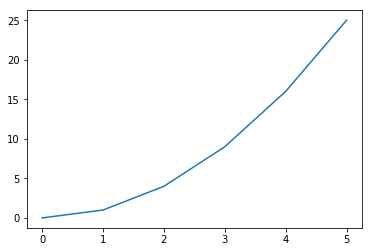

In [6]:
xData = [0,1,2,3,4,5]
yData = [0,1,4,9,16,25]
plt.plot(xData, yData)
plt.show()

In [10]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The foll

### Több adatsorral és némi formázással:
Ha több adatsort szeretnénk rátenni ugyanarra a diagramra, a legegyszerűbb a plt.plot() függvényt többször meghívni. Ez egymás után pakolja rá a diagramra a görbéket. Külön formázást és címkét is adhatunk minden új görbénkhez. A jelmagyarázatot a plt.legend() paranccsal kapcsoljuk be.

A cím és tengelyfeliratok beállítására szolgáló függvények nevei jól leírják, hogy mire használhatóak.

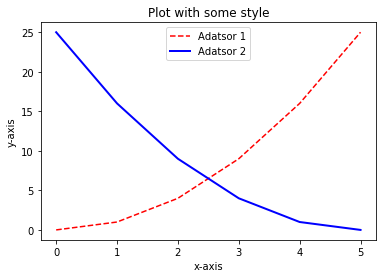

In [18]:
plt.plot(xData, yData, label = 'Adatsor 1', color = 'red', linestyle = '--')
plt.plot(xData, yData[::-1], label = 'Adatsor 2', color = 'blue', linewidth = 2)

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plot with some style')

plt.legend()

plt.show()

## 2. Hogyan épül fel egy plot?

Mielőtt rátérünk a konkrét plot-típusok és beállításaik megismerésére, szerintem hasznos megérteni, hogy hogyan is épül fel egy maplotlib-ben készült diagram. A fogalmakat sokszor angolul fogom használni részben az egyszerűség kedvéért, részben pedig mert így fokgtok tudni rákeresni.

A 2 fő fogalom amit használni fogunk:
 * Figure
 * Axes (subplots)
 
